<a href="https://colab.research.google.com/github/eirikngard/GEO4902/blob/master/Data_assimilation_Eirik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Activate the following in colab : 
!pip3 install netCDF4
!apt install proj-bin libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
    
import xarray as xr

     |████████████████████████████████| 4.3MB 8.5MB/s 
     |████████████████████████████████| 296kB 40.8MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev libproj-dev proj-bin
0 upgraded, 3 newly installed, 0 to remove and 11 not upgraded.
Need to get 305 kB of archives.
After this operation, 1,706 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 305 kB in 0s (3,022 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144600 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb

Two forecasts: The second forecast is initialized 3 hours laters and has thus utilized forecast_1 as model background.

# Fill in the dates and hours for the exercise

In [2]:
year = '2018'; day = '24'; month = '10'
hour_1 = '00'; hour_2 = '06'

url='https://thredds.met.no/thredds/dodsC/aromearcticarchive/'+year+'/'+month+'/'+day+'/arome_arctic_full_2_5km_'+year+month+day+'T'+hour_1+'Z.nc'
forecast_1 = xr.open_dataset(url)

url='https://thredds.met.no/thredds/dodsC/aromearcticarchive/'+year+'/'+month+'/'+day+'/arome_arctic_full_2_5km_'+year+month+day+'T'+hour_2+'Z.nc'
forecast_2 = xr.open_dataset(url)

In [3]:
forecast_1.air_temperature_ml

<xarray.DataArray 'air_temperature_ml' (time: 67, hybrid: 65, y: 949, x: 739)>
[3054209405 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 2018-10-24 ... 2018-10-26T18:00:00
  * hybrid     (hybrid) float64 0.009869 0.02961 0.04936 ... 0.9956 0.9985
  * x          (x) float32 278603.16 281103.16 283603.16 ... 2121103.2 2123603.2
  * y          (y) float32 -897931.56 -895431.56 ... 1469568.4 1472068.4
    longitude  (y, x) float64 ...
    latitude   (y, x) float64 ...
Attributes:
    long_name:      Air temperature model levels
    standard_name:  air_temperature
    units:          K
    grid_mapping:   projection_lambert
    _ChunkSizes:    [  1   1 949 739]

# Find a specific point and plot forecast

Note AROME Arctic is on an irregular grid

In [4]:
import math
import numpy as np

def findindex(alat,alon,plat,plon):
    #finding identical location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslon,abslat)
    latlon_idx = np.argmin(c)
    x, y = np.where(c == np.min(c))
    #print(alats[x,y],alon[x,y])
    x=int(x)
    y=int(y)
   
    return (x,y)

In [5]:
[ix,jx] = findindex(forecast_1.latitude,forecast_1.longitude,60.47,11.40) # Hamar

In [6]:
mlevel=64
tml_point_forecast_1 = forecast_1.air_temperature_ml[:,64,ix,jx]
tml_point_forecast_2 = forecast_2.air_temperature_ml[:,64,ix,jx]

Text(0.5, 1.0, 'Hamar Precipitation Forecast')

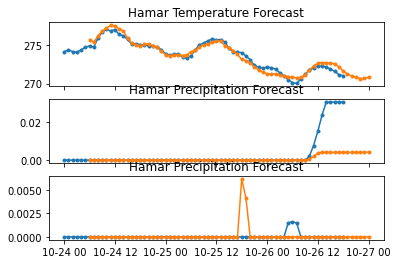

In [38]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, sharex=True)
ax[0].plot(forecast_1.time, tml_point_forecast_1, '.-',label="forecast 1")
ax[0].plot(forecast_2.time, tml_point_forecast_2, '.-',label="forecast 2")
ax[0].set_title("Hamar Temperature Forecast")
#plt.grid(); plt.legend(); 

ax[1].plot(forecast_1.time, forecast_1.precipitation_amount_acc[:,0,ix,jx], '.-',label="forecast 1")
ax[1].plot(forecast_2.time, forecast_2.precipitation_amount_acc[:,0,ix,jx], '.-',label="forecast 2")
ax[1].set_title("Hamar Precipitation Forecast")
#plt.grid(); plt.legend(); 

ax[2].plot(forecast_1.time, forecast_1.cloud_area_fraction_ml[:,64,ix,jx], '.-',label="forecast 1")
ax[2].plot(forecast_2.time, forecast_2.cloud_area_fraction_ml[:,64,ix,jx], '.-',label="forecast 2")
ax[2].set_title("Hamar Precipitation Forecast")
#plt.grid(); plt.legend(); 

In [18]:
forecast_1

<xarray.Dataset>
Dimensions:                                                                      (atmosphere_as_single_layer: 1, height0: 1, height1: 1, height2: 1, height3: 3, height4: 10, height5: 1, height6: 1, height_above_msl: 1, hybrid: 65, time: 67, top_of_atmosphere: 1, x: 739, y: 949)
Coordinates:
  * time                                                                         (time) datetime64[ns] 2018-10-24 ... 2018-10-26T18:00:00
  * height_above_msl                                                             (height_above_msl) float32 0.0
  * height0                                                                      (height0) float32 0.0
  * height1                                                                      (height1) float32 2.0
  * height2                                                                      (height2) float32 9144.0
  * height3                                                                      (height3) float32 0.0 ... 75.0
  * height4                                                                      (height4) float32 150.0 ... 6000.0
  * height5                                                                      (height5) float32 65.0
  * height6                                                                      (height6) float32 10.0
  * hybrid                                                                       (hybrid) float64 0.009869 ... 0.9985
  * atmosphere_as_single_layer                                                   (atmosphere_as_single_layer) int16 0
  * top_of_atmosphere                                                            (top_of_atmosphere) int16 0
  * x                                                                            (x) float32 278603.16 ... 2123603.2
  * y                                                                            (y) float32 -897931.56 ... 1472068.4
    longitude                                                                    (y, x) float64 -17.96 ... 68.83
    latitude                                                                     (y, x) float64 69.3 ... 71.11
Data variables:
    forecast_reference_time                                                      datetime64[ns] ...
    p0                                                                           float64 ...
    ap                                                                           (hybrid) float64 ...
    b                                                                            (hybrid) float64 ...
    projection_lambert                                                           int32 ...
    liquid_water_content_of_surface_snow                                         (time, height0, y, x) float32 ...
    air_temperature_0m                                                           (time, height0, y, x) float32 ...
    land_area_fraction                                                           (time, height0, y, x) float32 ...
    surface_aerosol_sea                                                          (time, height0, y, x) float32 ...
    surface_aerosol_land                                                         (time, height0, y, x) float32 ...
    surface_aerosol_soot                                                         (time, height0, y, x) float32 ...
    surface_aerosol_desert                                                       (time, height0, y, x) float32 ...
    ozone_profile_a                                                              (time, height0, y, x) float32 ...
    ozone_profile_b                                                              (time, height0, y, x) float32 ...
    ozone_profile_c                                                              (time, height0, y, x) float32 ...
    specific_humidity_ml                                                         (time, hybrid, y, x) float64 ...
    mass_fraction_of_cloud_condensed_water_in_air_ml                             (time, hybrid, y, x) float32 ...
    mas

# Plot forecast on a map

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The following kwargs were not used by contour: 'extemd'


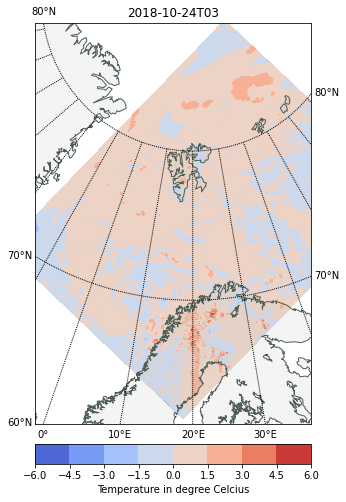

In [17]:
from mpl_toolkits.basemap import Basemap

timestep_1=3
timestep_2=0

fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=20, lat_0=78.4, 
            resolution='l', 
            llcrnrlat= 60.0, urcrnrlat=82.0, llcrnrlon=-1.0, urcrnrlon=100.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.

cs=m.contourf(x,y,np.array( forecast_1.air_temperature_ml[timestep_1,mlevel,:,:])- np.array(forecast_2.air_temperature_ml[timestep_2,mlevel,:,:]),cmap=plt.cm.coolwarm,extemd='max')
plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Temperature in degree Celcius')     